# Pràctica 3: Dissolucions i dipòsits

## 1. Dissolucions d'un producte en un dipòsit
Tenim un dipòsit de 100 litres en el qual entra aigua neta a una velocitat de $v_\text{aigua} = 6\text{ L/min}$, tint a $v_\text{tint} = 3\text{ L/min}$ i surt barreja a $v_\text{sortida} = 9\text{ L/min}$. Podem escriure l'equació que segueix la quantitat de tint $x$ com 
$$ x' = v_\text{tint} - \frac{x}{V} v_\text{sortida} .$$
Tenim que el volum segueix l'equació $V' = v_\text{tint} + v_\text{aigua} - v_\text{tint} = 0$, i per tant $V(t) = V_0$.

In [28]:
v_aigua = 6
v_tint = 3
v_sortida = 9
V0 = 100

var('t')
f= function('f')(t)
x1(t) = desolve(diff(f, t) == v_tint - (f/V0)*v_sortida, [f(t), t], ics = [0,0])
show(x1)

t |--> 100/3*(e^(9/100*t) - 1)*e^(-9/100*t)

Per tant la concentració de tint $c$ és

In [17]:
c1(t) = x1(t) / V0
show(c1(10).n())

0.197810113419800

Calculem el valor límit de la concentració

In [18]:
show(limit(c1(t), t = oo))

1/3

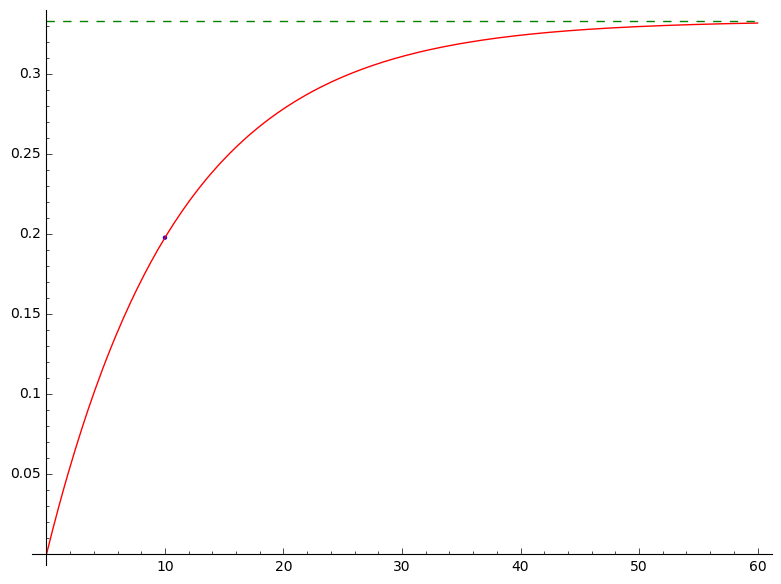

In [20]:
plot(c1(t), xmin = 0, xmax = 60, color = 'red') \
+ point((10, c1(10))) \
+ plot(1/3, xmin = 0, xmax = 60, color = 'green', linestyle = '--')

Si ara el cabal de sortida és $v_\text{sortida} = 10\text{ 10 L/min}$ tenim que l'equació del volum és $V' = v_\text{tint} + v_\text{aigua} - v_\text{tint} = -1$ i per tant $V(t) = V_0 - t$. Així l'equació per la quantitat és
$$ x' = v_\text{tint} - \frac{x}{V_0 - t} v_\text{sortida} .$$

In [22]:
v_sortida2 = 10
var('t')
f= function('f')(t)
x2(t) = desolve(diff(f, t) == v_tint - (f/(V0 - t))*v_sortida2, [f(t), t], ics = [0,0])
c2(t) = x2(t)/(V0 - t)
show(x2)

t |--> -1/3000000000000000000*t^10 + 1/3000000000000000*t^9 - 3/20000000000000*t^8 + 1/25000000000*t^7 - 7/1000000000*t^6 + 21/25000000*t^5 - 7/100000*t^4 + 1/250*t^3 - 3/20*t^2 + 3*t

Clarament el model funciona sempre que $V(t) > 0$, és a dir, per $t > 100$. Fem el gràfic de les dues concentracions i de les quantitats de tint

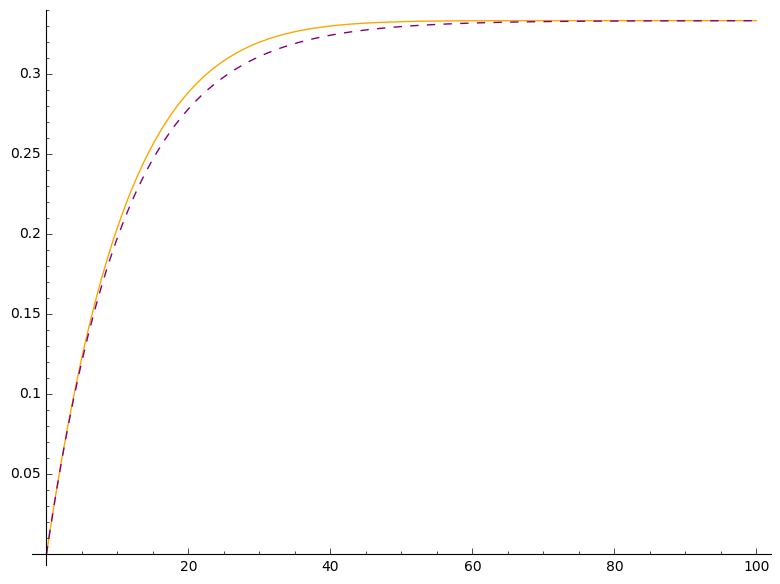

In [26]:
plot(c2(t), xmin = 0, xmax = 100, color = 'orange') \
+ plot(c1(t), xmin = 0, xmax = 100, color = 'purple', linestyle = '--')

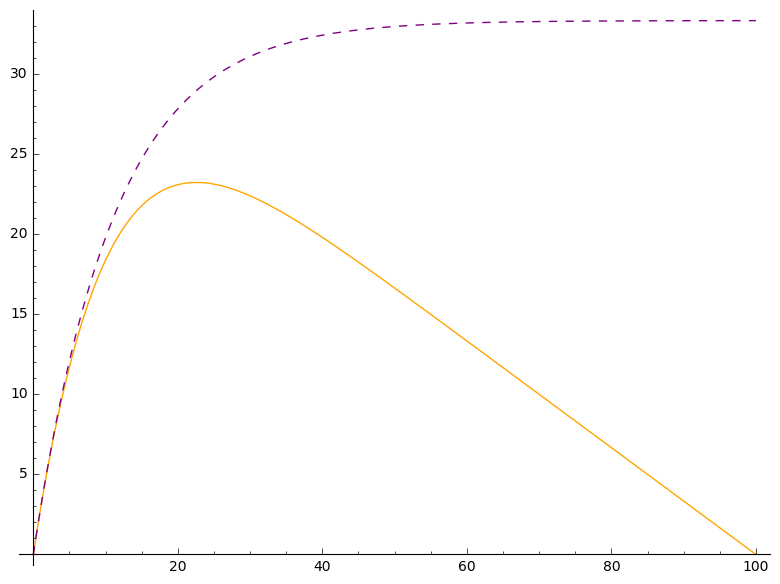

In [27]:
plot(x2(t), xmin = 0, xmax = 100, color = 'orange') \
+ plot(x1(t), xmin = 0, xmax = 100, color = 'purple', linestyle = '--')

## 2. Dissolucions d'un producte en dipòsits connectats en cadena
Tenim dos dipòsits, $A$ i $B$. $A$ té els mateixos cabdals d'entrada i sortida que a l'apartat anterior, de manera que la quantiat de tint $x_A$ ja la coneixem. Al dipòsit $B$ hi entra per una aixeta la sortida de $A$, per l'altra hi entren 2 L/min d'aigua neta i per una tercera hi surten 11 L/min. Els fluxs nets són zero de manera que el volum de cada dipòsit es manté constant. L'equació per la quantitat a $B$ és
$$x_B' = \frac{9}{100}x_A - \frac{11}{100} x_B.$$ 

In [40]:
xA(t) = x1(t)
xB(t) = desolve(diff(f, t) == (9/100)*xA(t) - (11/100)*f, [f(t), t], ics = [0,0])
cA(t) = xA(t)/100
cB(t) = xB(t)/100
show(cA(10).n())
show(cB(10).n())

0.197810113419800

0.0713963858367444

Calculem els valors als quals tendeixen les concentracions

In [42]:
show(limit(cA(t), t = oo))
show(limit(cB(t), t = oo))

1/3

3/11

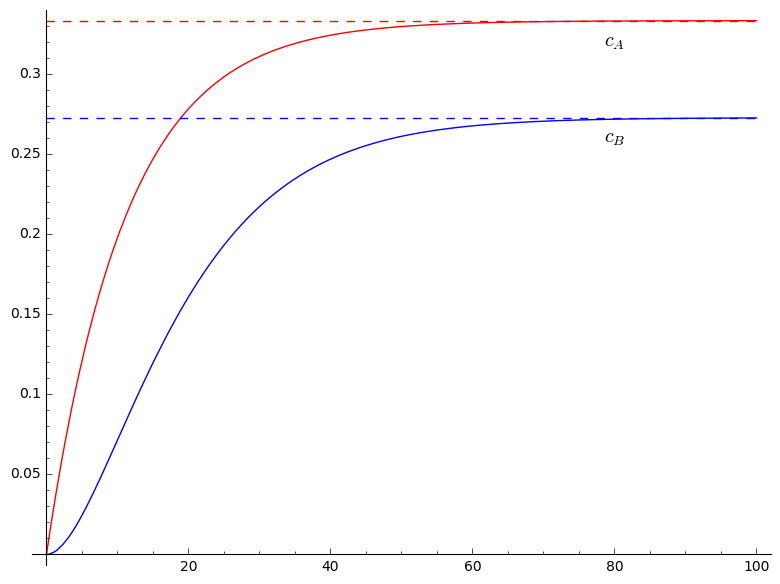

In [43]:
plot(cA(t), xmin = 0, xmax = 100, color = 'red') \
+ plot(cB(t), xmin = 0, xmax = 100, color = 'blue') \
+ text("$c_A$", (80, 0.32), color = 'black', fontsize = 'large') \
+ text("$c_B$", (80, 0.26), color = 'black', fontsize = 'large') \
+ plot(1/3, xmin = 0, xmax = 100, color = 'red', linestyle = '--') \
+ plot(3/11, xmin = 0, xmax = 100, color = 'blue', linestyle = '--')

## 3. Dissolucions d'un producte en dipòsits connectats
